# Fashion MNIST

What it means and what you can do about it!

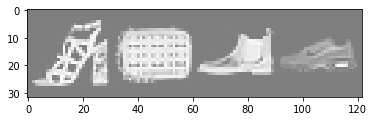

Sandal   Bag Ankle boot Sneaker


In [51]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter


trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                             download=True,
                                             transform=transforms.Compose([transforms.ToTensor()]))
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                            download=True,
                                            transform=transforms.Compose([transforms.ToTensor()]))
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = (
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Initialize tensorboard
writer = SummaryWriter('runs/fashion_mnist')


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# 2. Define a convolutional neural network


In [52]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5) # 6 filters, size 5x5,            output size = 24x24
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16, 3) # 16 filters, size 3x3,           outSize = 10x10

        # Define function
        self.fc1 = nn.Linear(16*5*5, 160)
        self.fc2 = nn.Linear(160, 120)
        self.fc3 = nn.Linear(120, 84)
        self.fc4 = nn.Linear(84, 10)

    def forward(self, x):
        # First convolution and max pooling
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

net = Net()

# 3. Define a Loss function and optimizer and train the network

In [53]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
plot_step = 0

for epoch in range (2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 1000 == 999:
            # Add data to tensorboard
            writer.add_scalar("Loss/train", running_loss/1000, plot_step)
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0
            plot_step = plot_step + 1

print('Finished training')
writer.flush()

# Save data
PATH = './model/trained_koen.pth'
torch.save(net.state_dict(), PATH)



[1,  1000] loss: 0.531
[1,  2000] loss: 0.353
[1,  3000] loss: 0.318
[1,  4000] loss: 0.286
[1,  5000] loss: 0.277
[1,  6000] loss: 0.260
[1,  7000] loss: 0.242
[1,  8000] loss: 0.235
[1,  9000] loss: 0.230
[1, 10000] loss: 0.221
[1, 11000] loss: 0.224
[1, 12000] loss: 0.208
[1, 13000] loss: 0.212
[1, 14000] loss: 0.201
[1, 15000] loss: 0.202
[2,  1000] loss: 0.192
[2,  2000] loss: 0.192
[2,  3000] loss: 0.194
[2,  4000] loss: 0.192
[2,  5000] loss: 0.194
[2,  6000] loss: 0.186
[2,  7000] loss: 0.171
[2,  8000] loss: 0.187
[2,  9000] loss: 0.181
[2, 10000] loss: 0.174
[2, 11000] loss: 0.174
[2, 12000] loss: 0.176
[2, 13000] loss: 0.176
[2, 14000] loss: 0.182
[2, 15000] loss: 0.174
Finished training


# 4. Test the network

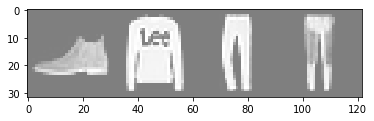

GroundTruth:  Ankle boot Pullover Trouser Trouser
Accuracy of the network on the test images: 86 %
Accuracy of T-shirt/top : 65 %
Accuracy of Trouser : 97 %
Accuracy of Pullover : 75 %
Accuracy of Dress : 90 %
Accuracy of  Coat : 85 %
Accuracy of Sandal : 97 %
Accuracy of Shirt : 66 %
Accuracy of Sneaker : 90 %
Accuracy of   Bag : 96 %
Accuracy of Ankle boot : 97 %


In [54]:
PATH = './model/trained_koen.pth'
dataiter = iter(testloader)
images, labels = dataiter.next()

# pints images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# load the trained model
net = Net()
net.load_state_dict(torch.load(PATH))

# test neural network
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c= (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

print('Accuracy of the network on the test images: %d %%' % (
    100 * sum(class_correct) / sum(class_total)))

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))




# 4. Create tensorboard


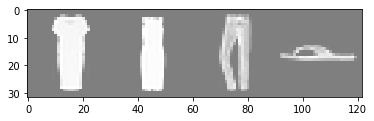

In [55]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

img_grid = torchvision.utils.make_grid(images)

imshow(img_grid)

writer.add_image('four_fashion_mnist_images', img_grid)
writer.add_graph(net, images)
writer.close()

